In [1]:
cd ..

C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction


In [2]:
import numpy as np
import torch
import json

from Magnetisation.Propagator import Propagator
from Magnetisation.Generator import generator_CNN
from Magnetisation.Train import Magnetisation_CNN_training
from Magnetisation.utils import LoadData

import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar


{'PixelSize': 4.08e-07,
 'ImageShape': 128,
 'NV': {'FindTheta': False,
  'Theta': 54.7,
  'FindPhi': False,
  'Phi': -35,
  'Height': 3e-07},
 'Magnetisation': {'FindTheta': False, 'Theta': 0, 'FindPhi': False, 'Phi': 0},
 'FFT': {'Extended': False,
  'Extention': 100,
  'performPadding': False,
  'PaddingFactor': 2,
  'PaddingMode': 'constant',
  'Filter': {'useHanning': True}}}

C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\Magnetisation\Propagator.py:351: RuntimeWarning: invalid value encountered in true_divide
  [-(kx ** 2) / k, -(kx * ky) / k, -1j * kx],
C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\Magnetisation\Propagator.py:352: RuntimeWarning: invalid value encountered in true_divide
  [-kx * ky / k, -(ky ** 2 / k), -1j * ky],
C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\Magnetisation\Propagator.py:592: RuntimeWarning: divide by zero encountered in true_divide
  mz_to_b = 1 / (
C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\Magnetisation\Propagator.py:592: RuntimeWarning: invalid value encountered in true_divide
  mz_to_b = 1 / (


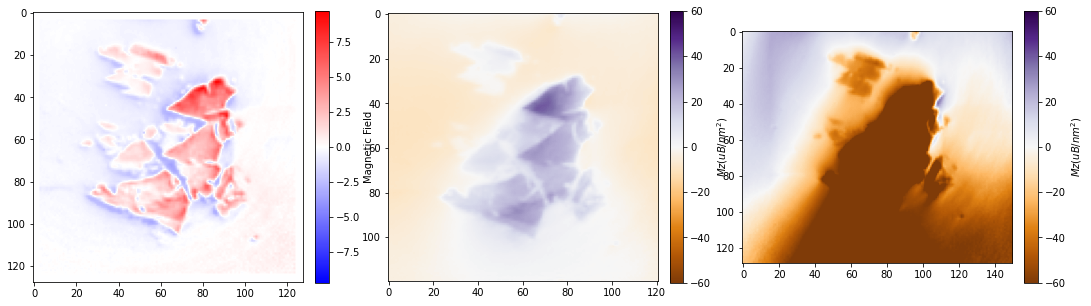

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Extract the data
f = open('data/Magnetisation out of plane/VI3_Exp_B_unimelb_diamond_351_Bnv.json')
data = json.load(f)
MagneticField = np.asarray(data['ExperimentMagneticField']['BNV']['Data'])/2

# MagneticField = np.hstack((MagneticField ,-np.fliplr(MagneticField)))

# # subtract the mean of the magnetic field
# fft_signal = np.fft.fft2(MagneticField) 
# fft_signal_clean = np.where(fft_signal.imag==0,0,fft_signal)
# MagneticField = np.fft.ifft2(fft_signal_clean).real

MagneticField = -1*MagneticField[110:-10,40:-10]
# Get the Fourier method propagation
MagnetizationMatlab = np.array(data['ExperimentMagneticField']['MagnetisationPropagation']['Magnetisation']['Mag'])[110:-1,20:-1]

# Define the dictionary for the forward propagation
PropagationOptions = dict()
PropagationOptions['PixelSize'] = 408e-9
PropagationOptions['ImageShape'] = 128
PropagationOptions['NV'] = dict()
PropagationOptions['NV']['FindTheta']=False
PropagationOptions['NV']['Theta'] = data['ExperimentMagneticField']['BNV']['Theta']
PropagationOptions['NV']['FindPhi']=False
PropagationOptions['NV']['Phi'] = 55 - 90 #data['ExperimentMagneticField']['BNV']['Phi'] -90
PropagationOptions['NV']['Height'] = 300e-9 #data['ExperimentMagneticField']['BNV']['Height']
PropagationOptions['Magnetisation'] = dict()
PropagationOptions['Magnetisation']['FindTheta']=False
PropagationOptions['Magnetisation']['Theta'] = 0
PropagationOptions['Magnetisation']['FindPhi']=False
PropagationOptions['Magnetisation']['Phi'] = 0
PropagationOptions['FFT'] = dict()
PropagationOptions['FFT']['Extended'] = False
PropagationOptions['FFT']['Extention'] = 100
PropagationOptions['FFT']['performPadding'] = False
PropagationOptions['FFT']['PaddingFactor'] = 2
PropagationOptions['FFT']['PaddingMode'] = 'constant'
PropagationOptions['FFT']['Filter'] = dict()
PropagationOptions['FFT']['Filter']['useHanning'] = True

display(PropagationOptions)

PROP1 = Propagator(PropagationOptions, MagneticField,PropagationOptions['ImageShape'])

FourierMag = PROP1.magnetisation(MagneticField)

extData, ROI = PROP1.extendData(MagneticField)

PROP = Propagator(PropagationOptions, extData,PropagationOptions['ImageShape'])

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(18)

plt.subplot(1,3,1)
PlotData = PROP.MagneticFieldExtended
Range = np.max(np.abs(PlotData))
plt.imshow(PlotData, cmap="bwr", vmin = -Range, vmax = Range)
plt.colorbar(fraction=0.046, pad=0.04,label="Magnetic Field")


plt.subplot(1,3,2)
PlotData = FourierMag
Range = np.max(np.abs(PlotData))
plt.imshow(PlotData, cmap="PuOr", vmin = -Range, vmax = Range)
plt.colorbar(fraction=0.046, pad=0.04,label="$Mz (uB/nm^2)$")
plt.clim([-60,60])

plt.subplot(1,3,3)
PlotData = MagnetizationMatlab
Range = np.max(np.abs(PlotData))
plt.imshow(PlotData, cmap="PuOr", vmin = -Range, vmax = Range)
plt.colorbar(fraction=0.046, pad=0.04,label="$Mz (uB/nm^2)$")
plt.clim([-60,60])



In [4]:
Generator = generator_CNN(Size=1, ImageSize=PROP.options['ImageShape'], bayesian=True).to(device)

L1


  0%|          | 0/701 [00:00<?, ?it/s]C:\Users\parax\anaconda3\envs\py_new\lib\site-packages\torch\autograd\__init__.py:154: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ..\aten\src\ATen\native\Copy.cpp:244.)
  Variable._execution_engine.run_backward(
 29%|██▉       | 205/701 [00:12<00:30, 16.01it/s]

integer
integer


 30%|██▉       | 209/701 [00:12<00:30, 16.09it/s]

integer
integer


 30%|███       | 211/701 [00:12<00:30, 15.97it/s]

integer
integer


 31%|███       | 215/701 [00:12<00:33, 14.46it/s]

integer
integer


 32%|███▏      | 221/701 [00:13<00:32, 14.74it/s]

integer
integer


 32%|███▏      | 225/701 [00:13<00:31, 15.07it/s]

integer
integer


 32%|███▏      | 227/701 [00:13<00:31, 14.94it/s]

integer
integer


 33%|███▎      | 231/701 [00:13<00:33, 14.16it/s]

integer
integer


 34%|███▎      | 235/701 [00:14<00:32, 14.46it/s]

integer
integer


 34%|███▍      | 241/701 [00:14<00:31, 14.77it/s]

integer
integer


 35%|███▍      | 245/701 [00:14<00:29, 15.48it/s]

integer
integer


 36%|███▌      | 249/701 [00:14<00:28, 15.78it/s]

integer
integer


 36%|███▌      | 253/701 [00:15<00:27, 16.12it/s]

integer
integer


 37%|███▋      | 257/701 [00:15<00:27, 15.91it/s]

integer
integer


 37%|███▋      | 261/701 [00:15<00:27, 16.15it/s]

integer
integer


 38%|███▊      | 263/701 [00:15<00:28, 15.46it/s]

integer
integer


 38%|███▊      | 267/701 [00:16<00:28, 15.05it/s]

integer
integer


 39%|███▉      | 273/701 [00:16<00:30, 14.15it/s]

integer
integer


 40%|███▉      | 277/701 [00:16<00:29, 14.22it/s]

integer
integer


 40%|████      | 281/701 [00:17<00:27, 15.03it/s]

integer
integer


 41%|████      | 285/701 [00:17<00:26, 15.94it/s]

integer
integer


 41%|████      | 289/701 [00:17<00:25, 16.27it/s]

integer
integer


 42%|████▏     | 293/701 [00:17<00:25, 16.05it/s]

integer
integer


 42%|████▏     | 297/701 [00:18<00:25, 15.83it/s]

integer
integer


 43%|████▎     | 301/701 [00:18<00:26, 15.32it/s]

integer
integer


 43%|████▎     | 303/701 [00:18<00:25, 15.48it/s]

integer
integer


 44%|████▍     | 309/701 [00:18<00:24, 15.88it/s]

integer
integer


 45%|████▍     | 313/701 [00:19<00:23, 16.62it/s]

integer
integer


 45%|████▌     | 317/701 [00:19<00:23, 16.37it/s]

integer
integer


 46%|████▌     | 321/701 [00:19<00:23, 16.42it/s]

integer
integer


 46%|████▋     | 325/701 [00:19<00:23, 16.10it/s]

integer
integer


 47%|████▋     | 327/701 [00:19<00:23, 16.19it/s]

integer
integer


 48%|████▊     | 333/701 [00:20<00:22, 16.14it/s]

integer
integer


 48%|████▊     | 337/701 [00:20<00:22, 15.89it/s]

integer
integer


 49%|████▊     | 341/701 [00:20<00:22, 16.22it/s]

integer
integer


 49%|████▉     | 345/701 [00:21<00:21, 16.29it/s]

integer
integer


 50%|████▉     | 347/701 [00:21<00:22, 15.78it/s]

integer
integer


 50%|█████     | 353/701 [00:21<00:22, 15.33it/s]

integer
integer


 51%|█████     | 357/701 [00:21<00:22, 15.57it/s]

integer
integer


 51%|█████▏    | 361/701 [00:22<00:21, 15.79it/s]

integer
integer


 52%|█████▏    | 365/701 [00:22<00:22, 14.82it/s]

integer
integer


 52%|█████▏    | 367/701 [00:22<00:23, 14.22it/s]

integer
integer


 53%|█████▎    | 371/701 [00:22<00:24, 13.44it/s]

integer
integer


 54%|█████▍    | 377/701 [00:23<00:22, 14.30it/s]

integer
integer


 54%|█████▍    | 379/701 [00:23<00:22, 14.61it/s]

integer
integer


 55%|█████▍    | 385/701 [00:23<00:20, 15.40it/s]

integer
integer


 55%|█████▌    | 387/701 [00:23<00:20, 15.47it/s]

integer
integer


 56%|█████▌    | 391/701 [00:24<00:21, 14.36it/s]

integer
integer


 56%|█████▋    | 395/701 [00:24<00:22, 13.77it/s]

integer
integer


 57%|█████▋    | 399/701 [00:24<00:22, 13.60it/s]

integer
integer


 58%|█████▊    | 405/701 [00:25<00:20, 14.21it/s]

integer
integer


 58%|█████▊    | 409/701 [00:25<00:19, 15.21it/s]

integer
integer


 59%|█████▉    | 413/701 [00:25<00:17, 16.18it/s]

integer
integer


 59%|█████▉    | 417/701 [00:25<00:17, 15.98it/s]

integer
integer


 60%|█████▉    | 419/701 [00:26<00:17, 16.05it/s]

integer
integer


 61%|██████    | 425/701 [00:26<00:16, 16.34it/s]

integer
integer


 61%|██████    | 429/701 [00:26<00:16, 16.19it/s]

integer
integer


 62%|██████▏   | 433/701 [00:26<00:16, 16.18it/s]

integer
integer


 62%|██████▏   | 437/701 [00:27<00:16, 16.12it/s]

integer
integer


 63%|██████▎   | 441/701 [00:27<00:16, 15.79it/s]

integer
integer


 63%|██████▎   | 443/701 [00:27<00:16, 15.46it/s]

integer
integer


 64%|██████▍   | 447/701 [00:27<00:18, 13.83it/s]

integer
integer


 64%|██████▍   | 451/701 [00:28<00:19, 13.13it/s]

integer
integer


 65%|██████▍   | 455/701 [00:28<00:20, 11.94it/s]

integer
integer


 66%|██████▌   | 461/701 [00:28<00:17, 13.72it/s]

integer
integer


 66%|██████▋   | 465/701 [00:29<00:15, 15.05it/s]

integer
integer


 67%|██████▋   | 467/701 [00:29<00:15, 15.39it/s]

integer
integer


 67%|██████▋   | 473/701 [00:29<00:15, 15.03it/s]

integer
integer


 68%|██████▊   | 477/701 [00:30<00:14, 15.73it/s]

integer
integer


 69%|██████▊   | 481/701 [00:30<00:14, 15.44it/s]

integer
integer


 69%|██████▉   | 485/701 [00:30<00:13, 15.82it/s]

integer
integer


 70%|██████▉   | 489/701 [00:30<00:13, 16.23it/s]

integer
integer


 70%|███████   | 491/701 [00:30<00:13, 16.12it/s]

integer
integer


 71%|███████   | 497/701 [00:31<00:12, 16.45it/s]

integer
integer


 71%|███████▏  | 501/701 [00:31<00:12, 16.34it/s]

integer
integer


 72%|███████▏  | 505/701 [00:31<00:11, 16.84it/s]

integer
integer


 73%|███████▎  | 509/701 [00:31<00:11, 16.55it/s]

integer
integer


 73%|███████▎  | 513/701 [00:32<00:11, 16.56it/s]

integer
integer


 74%|███████▍  | 517/701 [00:32<00:11, 16.13it/s]

integer
integer


 74%|███████▍  | 519/701 [00:32<00:11, 16.29it/s]

integer
integer


 75%|███████▍  | 523/701 [00:32<00:11, 15.78it/s]

integer
integer


 75%|███████▌  | 529/701 [00:33<00:11, 14.73it/s]

integer
integer


 76%|███████▌  | 533/701 [00:33<00:11, 15.02it/s]

integer
integer


 77%|███████▋  | 537/701 [00:33<00:10, 15.28it/s]

integer
integer


 77%|███████▋  | 541/701 [00:34<00:10, 15.70it/s]

integer
integer


 78%|███████▊  | 545/701 [00:34<00:09, 15.74it/s]

integer
integer


 78%|███████▊  | 549/701 [00:34<00:09, 15.90it/s]

integer
integer


 79%|███████▊  | 551/701 [00:34<00:09, 15.43it/s]

integer
integer


 79%|███████▉  | 557/701 [00:35<00:09, 15.19it/s]

integer
integer


 80%|████████  | 561/701 [00:35<00:09, 15.51it/s]

integer
integer


 81%|████████  | 565/701 [00:35<00:08, 15.64it/s]

integer
integer


 81%|████████  | 567/701 [00:35<00:08, 15.86it/s]

integer
integer


 82%|████████▏ | 573/701 [00:36<00:08, 15.71it/s]

integer
integer


 82%|████████▏ | 575/701 [00:36<00:08, 15.56it/s]

integer
integer


 83%|████████▎ | 579/701 [00:36<00:08, 14.24it/s]

integer
integer


 83%|████████▎ | 583/701 [00:36<00:08, 13.21it/s]

integer
integer


 84%|████████▍ | 589/701 [00:37<00:07, 14.86it/s]

integer
integer


 85%|████████▍ | 593/701 [00:37<00:07, 15.16it/s]

integer
integer


 85%|████████▌ | 597/701 [00:37<00:06, 15.91it/s]

integer
integer


 86%|████████▌ | 601/701 [00:37<00:06, 15.87it/s]

integer
integer


 86%|████████▋ | 605/701 [00:38<00:06, 15.63it/s]

integer
integer


 87%|████████▋ | 609/701 [00:38<00:05, 15.76it/s]

integer
integer


 87%|████████▋ | 613/701 [00:38<00:05, 16.16it/s]

integer
integer


 88%|████████▊ | 617/701 [00:38<00:05, 15.97it/s]

integer
integer


 89%|████████▊ | 621/701 [00:39<00:05, 15.89it/s]

integer
integer


 89%|████████▉ | 623/701 [00:39<00:04, 15.80it/s]

integer
integer


 90%|████████▉ | 629/701 [00:39<00:04, 15.38it/s]

integer
integer


 90%|█████████ | 633/701 [00:40<00:04, 15.22it/s]

integer
integer


 91%|█████████ | 635/701 [00:40<00:04, 14.45it/s]

integer
integer


 91%|█████████ | 639/701 [00:40<00:04, 12.98it/s]

integer
integer


 92%|█████████▏| 643/701 [00:40<00:04, 12.17it/s]

integer
integer


 92%|█████████▏| 647/701 [00:41<00:04, 12.51it/s]

integer
integer


 93%|█████████▎| 651/701 [00:41<00:03, 12.89it/s]

integer
integer


 93%|█████████▎| 655/701 [00:41<00:03, 13.78it/s]

integer
integer


 94%|█████████▍| 661/701 [00:42<00:02, 15.29it/s]

integer
integer


 95%|█████████▍| 665/701 [00:42<00:02, 15.17it/s]

integer
integer


 95%|█████████▌| 669/701 [00:42<00:02, 15.79it/s]

integer
integer


 96%|█████████▌| 671/701 [00:42<00:01, 15.72it/s]

integer
integer


 97%|█████████▋| 677/701 [00:43<00:01, 16.28it/s]

integer
integer


 97%|█████████▋| 681/701 [00:43<00:01, 16.43it/s]

integer
integer


 98%|█████████▊| 685/701 [00:43<00:00, 16.92it/s]

integer
integer


 98%|█████████▊| 689/701 [00:43<00:00, 16.79it/s]

integer
integer


 99%|█████████▉| 693/701 [00:44<00:00, 17.03it/s]

integer
integer


 99%|█████████▉| 697/701 [00:44<00:00, 16.78it/s]

integer
integer


100%|██████████| 701/701 [00:44<00:00, 15.73it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


integer
integer


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


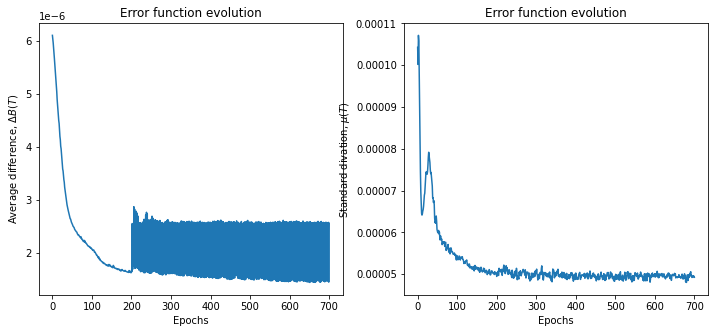

In [5]:
CNN_training = Magnetisation_CNN_training(device, Generator, PROP)
bnv_cnn = CNN_training.train_cnn(LossFunction = 'L1', 
                                 Epochs = 701, 
                                 IntegerOnly = True,
                                 IntergerInitialTraining = 200,
                                 IntegerOnlyRate=2, 
                                 MagnetisationLayerRange=[1, 3], 
                                 PositiveMagnetisationOnly=True)

C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\Magnetisation\Train.py:368: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Results["Original B"] = np.rot90(self.PROP.MagneticFieldExtended[self.PROP.OriginalROI] * unit_conversion_M_to_B, k=1)
C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\Magnetisation\Train.py:369: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Results["Reconstructed B"] = np.rot90(ReconstructedBnv[self.PROP.OriginalROI] * unit_conversion_M_to_B , k=1)
C:\Users\parax\Dropbox\Pr

array([[2.0034096]], dtype=float32)

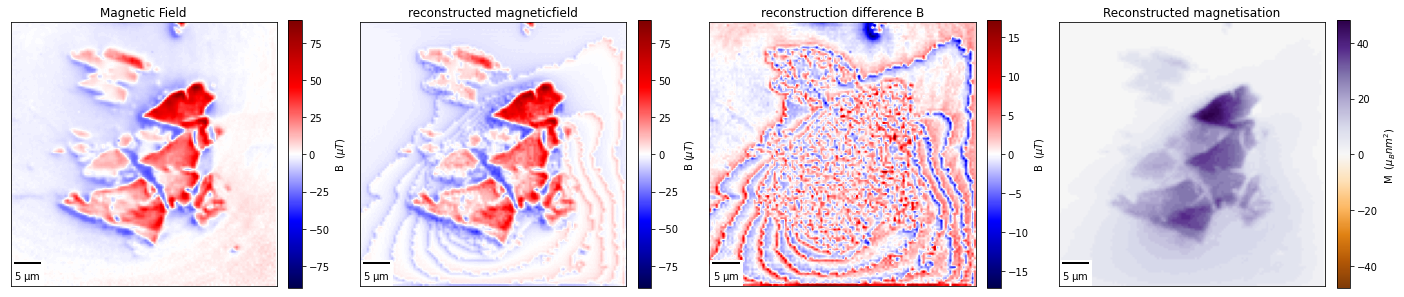

In [6]:
Results = CNN_training.extract_results(plotResults = True)
display(Results['M Mag'])

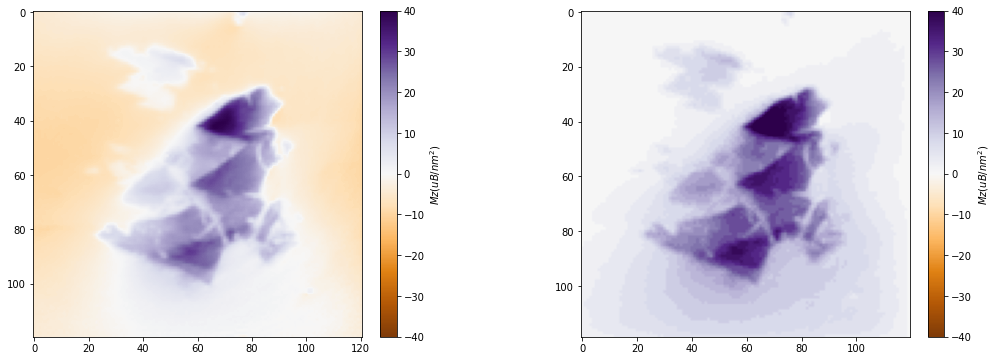

In [7]:
# FourierMag = -np.flipud(np.rot90(Magnetization))
# Magnetisation = - Results["Magnetisation"][ROI[0],ROI[1]]
Magnetisation = Results["Magnetisation"]

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(18)

plt.subplot(1,2,1)
PlotData = FourierMag
Range = np.max(np.abs(PlotData))
plt.imshow(PlotData, cmap="PuOr", vmin = -Range, vmax = Range)
plt.colorbar(fraction=0.046, pad=0.04,label="$Mz (uB/nm^2)$")
plt.clim([-40,40])

plt.subplot(1,2,2)
PlotData = Magnetisation
Range = np.max(np.abs(PlotData))
plt.imshow(PlotData, cmap="PuOr", vmin = -Range, vmax = Range)
plt.colorbar(fraction=0.046, pad=0.04,label="$Mz (uB/nm^2)$")
plt.clim([-40,40])


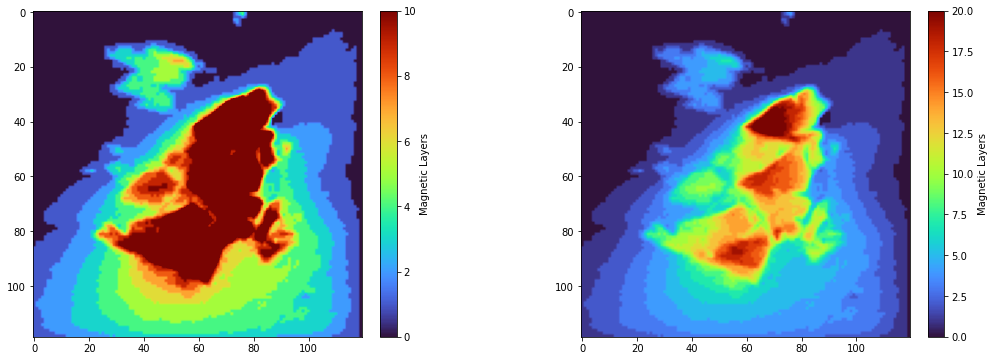

In [8]:
# Plot the layers
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(18)

plt.subplot(1,2,1)
PlotData = Magnetisation / Results['M Mag']
Range = np.max(np.abs(PlotData))
plt.imshow(PlotData, cmap="turbo" )
plt.colorbar(fraction=0.046, pad=0.04,label="Magnetic Layers")
plt.clim([0,10])

plt.subplot(1,2,2)
PlotData = np.abs(Magnetisation / Results['M Mag'])
Range = np.max(np.abs(PlotData))
plt.imshow(PlotData, cmap="turbo")
plt.colorbar(fraction=0.046, pad=0.04,label="Magnetic Layers")
plt.clim([0,20])


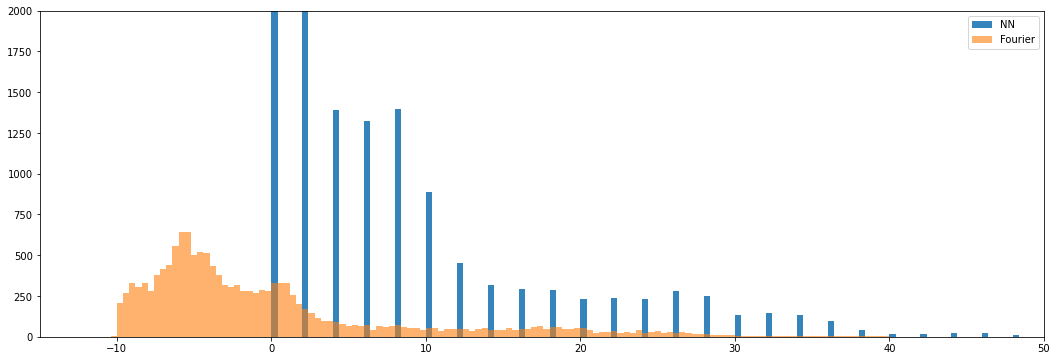

In [15]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(18)

ImgShape = Magnetisation.shape
ImgShape2 = FourierMag.shape

plt.hist(Magnetisation.reshape(ImgShape[0]*ImgShape[1]) , bins = 200, range = (-20, 60), alpha = 0.9)
plt.hist(FourierMag.reshape(ImgShape2[0]*ImgShape2[1]), bins = 200,  range = (-20, 60), alpha = 0.6)
plt.ylim([0, 2000])
plt.xlim([-15, 50])
plt.legend(['NN', 'Fourier'])